In [24]:
# Cargamos las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [25]:
# Cargamos el dataset set de amazon datos limpios
df = pd.read_csv('../data/data_procesed/amazon_data_clean.csv', sep=',', encoding='utf-8')

## Vamos a realizar un EDA completo de los datos.

In [26]:
# Hacemos un shape del dataset
print("Shape del dataset:", df.shape)

Shape del dataset: (1103170, 10)


In [27]:
# Miramos el tipo de datos y los nulos
print("\nInfo general:")
print(df.info())


Info general:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1103170 entries, 0 to 1103169
Data columns (total 10 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   name              1103170 non-null  object 
 1   main_category     1103170 non-null  object 
 2   sub_category      1103170 non-null  object 
 3   image             1103170 non-null  object 
 4   link              1103170 non-null  object 
 5   ratings           751582 non-null   object 
 6   no_of_ratings     1103170 non-null  int64  
 7   discount_price    980844 non-null   float64
 8   actual_price      1067544 non-null  float64
 9   discount_percent  980844 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 84.2+ MB
None


In [28]:
# Printemos las primeras filas del dataset
display(df.head(10))


,name,main_category,sub_category,image,link,ratings,no_of_ratings,discount_price,actual_price,discount_percent
0,Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31UISB90sY...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,2255,32999.0,58990.0,44.0
1,LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.2,2948,46490.0,75990.0,39.0
2,LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Inverter-Convertible-...,4.2,1206,34490.0,61990.0,44.0
3,LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51JFb7FctD...,https://www.amazon.in/LG-Convertible-Anti-Viru...,4.0,69,37990.0,68990.0,45.0
4,Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41lrtqXPiW...,https://www.amazon.in/Carrier-Inverter-Split-C...,4.1,630,34490.0,67790.0,49.0
5,Voltas 1.4 Ton 3 Star Inverter Split AC(Copper...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/41TuyxwZ9m...,https://www.amazon.in/Voltas-Adjustable-173V-V...,4.0,1666,31990.0,70990.0,55.0
6,Lloyd 1.0 Ton 3 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31IXlxIPsO...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.2,1097,29999.0,49990.0,40.0
7,Lloyd 1.5 Ton 5 Star Inverter Split Ac (5 In 1...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/31IXlxIPsO...,https://www.amazon.in/Lloyd-Inverter-Convertib...,4.3,1494,39990.0,67990.0,41.0
8,Carrier 1 Ton 3 Star AI Flexicool Inverter Spl...,appliances,Air Conditioners,https://m.media-amazon.com/images/I/51sTXvsanQ...,https://www.amazon.in/Carrier-Flexicool-Invert...,4.1,674,30990.0,58190.0,47.0
9,"Voltas 1.5 Ton, 5 Star, Inverter Split AC(Copp...",appliances,Air Conditioners,https://m.media-amazon.com/images/I/51WQ3nWF0v...,https://www.amazon.in/Voltas-Inverter-Split-Co...,4.0,801,37999.0,73990.0,49.0


In [39]:
#Veo que el dataframe las columnas discount_price y actual_price están en centavos, por lo que las divido entre 100 para tener el precio en dolares.
df['discount_price'] = df['discount_price'] / 100
df['actual_price']   = df['actual_price']   / 100

# Opcional: si también quieres ver que quedó bien:
print(df[['name', 'discount_price', 'actual_price']].head())

                                                name  discount_price  \
0  Lloyd 1.5 Ton 3 Star Inverter Split Ac (5 In 1...          329.99   
1  LG 1.5 Ton 5 Star AI DUAL Inverter Split AC (C...          464.90   
2  LG 1 Ton 4 Star Ai Dual Inverter Split Ac (Cop...          344.90   
3  LG 1.5 Ton 3 Star AI DUAL Inverter Split AC (C...          379.90   
4  Carrier 1.5 Ton 3 Star Inverter Split AC (Copp...          344.90   

   actual_price  
0         589.9  
1         759.9  
2         619.9  
3         689.9  
4         677.9  


In [40]:
# Decido crear una columna nueva que saco de la columna link y contiene el asin que es un dato bastante importante como dato unico de producto
import re

def extraer_asin(link):
    match = re.search(r"/dp/([A-Z0-9]{10})", link)
    return match.group(1) if match else None

df["asin"] = df["link"].apply(extraer_asin)


In [41]:
df['asin'].value_counts()

asin
B0B1J299BN    14
B00NIOC4KE    12
B09G6RG1YX    12
B0BRHZM946    10
B0BRJJ7QHZ    10
              ..
B08X7X2YNB     2
B08X1MB7LR     2
B08X1HGKPZ     2
B08WR7P1DR     2
B0BQGTYXRY     2
Name: count, Length: 471156, dtype: int64

In [42]:
# Hacemos un resumen estadistico de los datos numericos
print("\nResumen estadístico:")
display(df.describe())


Resumen estadístico:


,no_of_ratings,discount_price,actual_price,discount_percent,discount_percentage
count,1.103170e+06,1.067544e+06,1.067544e+06,980844.000000,1.067538e+06
mean,5.633157e+02,2.872724e+01,2.311128e+02,49.255680,4.525673e+01
std,7.092570e+03,9.565771e+01,1.355081e+05,21.399692,2.453159e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,0.000000e+00,3.990000e+00,9.900000e+00,35.000000,2.857865e+01
50%,4.000000e+00,6.990000e+00,1.599000e+01,50.000000,5.001250e+01
75%,4.900000e+01,1.549000e+01,2.999000e+01,66.000000,6.458073e+01
max,5.895470e+05,1.249990e+04,9.900000e+07,100.000000,9.999999e+01


In [43]:
# Hacemos un analisis de nulos por columna
print("\nValores nulos por columna:")
print(df.isnull().sum())


Valores nulos por columna:
name                        0
main_category               0
sub_category                0
image                       0
link                        0
ratings                351588
no_of_ratings               0
discount_price          35626
actual_price            35626
discount_percent       122326
asin                        0
discount_percentage     35632
dtype: int64


In [44]:
# Después de ver los nulos, decido eliminar los nulos de discount price asuminendo que son al mismo precio que atual price.
df['discount_price'] = df['discount_price'].fillna(df['actual_price'])

In [45]:
# Ahora deberiamos recalcular el discount percentage
df['discount_percentage'] = ((df['actual_price'] - df['discount_price']) / df['actual_price']) * 100

In [46]:
# Decido eliminar las filas con nulos de la categoria ratings y actual price por que son pocos registros y no creo que cambien el resultado final
df_eda = df[
    df['ratings'].notnull() &
    df['actual_price'].notnull()
].copy()


In [47]:
# Quiero ver los datos diferentes en las categorias main_category y actual_price
df_eda['main_category'] = df_eda['main_category'].astype('category')
df_eda['actual_price'] = df_eda['actual_price'].astype('category')
# Visualizamos los datos diferentes en las categorias main_category y actual_price
print("\nDatos diferentes en las categorias main_category y actual_price:")
print("Main category:")
print(df_eda['main_category'].cat.categories)
print("Actual price:")
print(df_eda['actual_price'].cat.categories)    
len(df_eda['main_category'].cat.categories), len(df_eda['actual_price'].cat.categories)



Datos diferentes en las categorias main_category y actual_price:
Main category:
Index(['accessories', 'appliances', 'bags & luggage', 'beauty & health',
       'car & motorbike', 'grocery & gourmet foods', 'home & kitchen',
       'home, kitchen, pets', 'industrial supplies', 'kids' fashion',
       'men's clothing', 'men's shoes', 'music', 'pet supplies',
       'sports & fitness', 'stores', 'toys & baby products',
       'tv, audio & cameras', 'women's clothing', 'women's shoes'],
      dtype='object')
Actual price:
Index([        0.0,        0.04,         0.1,        0.15,        0.18,
               0.2,        0.22,        0.25,        0.27,        0.28,
       ...
            4249.0,      4799.0,     4999.95,      5899.0,     6094.95,
            6999.0,      7003.0,     15949.0,    610829.9, 98999999.99],
      dtype='float64', length=12353)


(20, 12353)

In [48]:
# Guardamos el dataset para subirlo a sql
df_eda.to_csv('../data/data_procesed/amazon_data_clean_eda.csv', sep=',', encoding='utf-8', index=False)


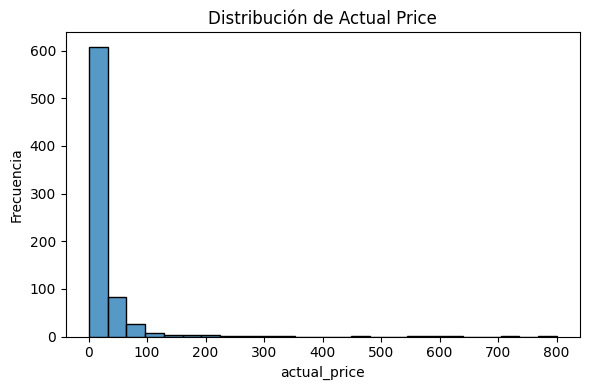

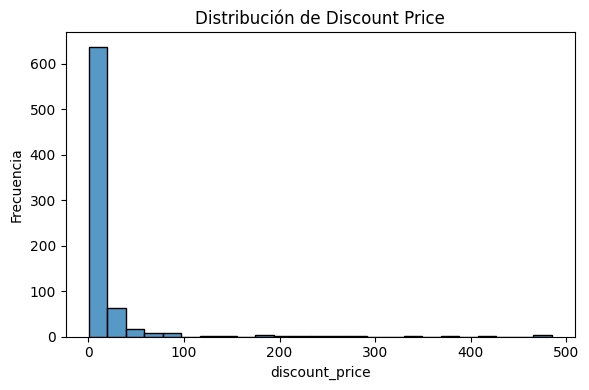

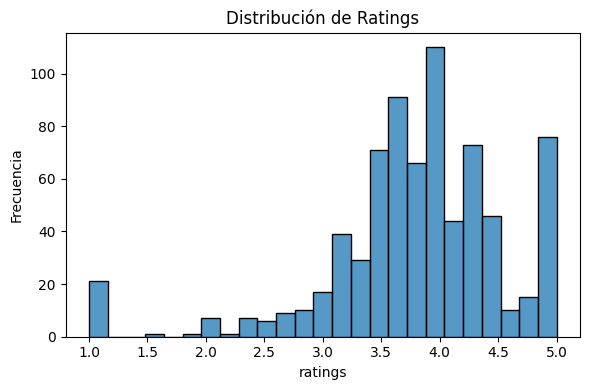

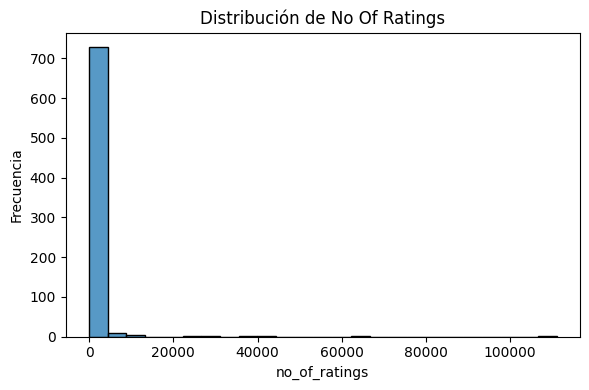

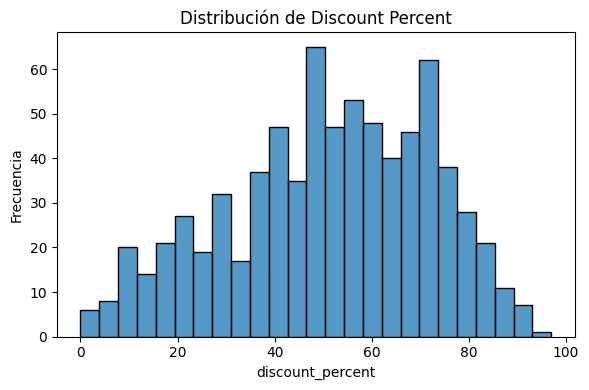

In [49]:
# Creo graficos de distribucion de las variables numericas

# Selección manual de columnas numéricas importantes
variables = ["actual_price", "discount_price", "ratings", "no_of_ratings", "discount_percent"]

# Limpiar y convertir forzosamente a numérico
df_plot = df_eda[variables].copy()
df_plot = df_plot.apply(pd.to_numeric, errors='coerce').dropna()

# Muestra segura
df_sample = df_plot.sample(n=min(750, len(df_plot)), random_state=42)

# Graficar variables una por una
for col in variables:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_sample[col], bins=25, kde=False)
    plt.title(f"Distribución de {col.replace('_', ' ').title()}")
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()



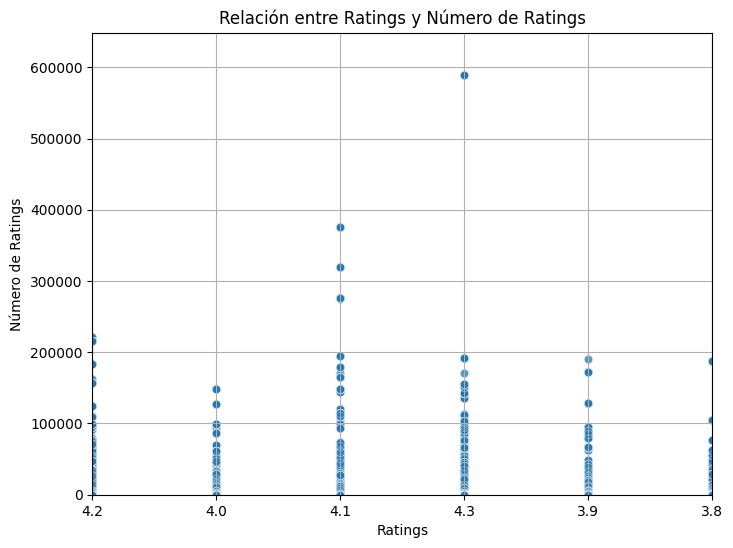

In [50]:
# Miramos si encuentro correlacion entre las columnas ratings y no_of_ratings
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df_eda, x='ratings', y='no_of_ratings', alpha=0.5)
plt.title('Relación entre Ratings y Número de Ratings')
plt.xlabel('Ratings')
plt.ylabel('Número de Ratings')
plt.xlim(0, 5)
plt.ylim(0, df_eda['no_of_ratings'].max() * 1.1)
plt.grid()
plt.show()

📊 Análisis Exploratorio de Datos (EDA) – Variables Numéricas
1. Distribución de Ratings
La mayoría de los productos tienen calificaciones entre 4.0 y 4.5, lo cual indica que los productos en Amazon suelen tener una buena valoración general.

Esto puede dificultar distinguir calidad únicamente por ratings, ya que la mayoría está bien valorada.

2. Número de Valoraciones (no_of_ratings)
Distribución altamente sesgada a la izquierda.

Muchos productos tienen muy pocas reviews, mientras que unos pocos productos tienen decenas o incluso cientos de miles (outliers).

Se recomienda aplicar una escala logarítmica o analizar por percentiles para evitar distorsiones.

3. Precio Original (actual_price)
Gran concentración en precios bajos, pero con presencia de outliers muy grandes (hasta 10 mil millones).

Se identifican errores o registros poco fiables, que deberían ser filtrados en etapas posteriores.

4. Precio con Descuento (discount_price)
Patrón similar al de actual_price, con la mayoría de productos concentrados en el rango más bajo.

Al haber imputado los nulos con actual_price, muchos productos tienen discount_price = actual_price, lo cual implica sin descuento.

5. Porcentaje de Descuento (discount_percent)
Distribución interesante, con un claro pico entre 50% y 60% de descuento.

Muchas observaciones entre 30% y 70%, lo que refleja una estrategia agresiva de descuentos en Amazon.

✅ Conclusión general del EDA numérico:
Los datos muestran una plataforma con productos altamente valorados pero con gran desigualdad en visibilidad y precios. Los descuentos agresivos podrían ser un factor determinante en las decisiones de compra, y hay que considerar el sesgo de productos sin suficientes valoraciones. Además, se recomienda gestionar outliers extremos en precios.

